# Load the loss values on subsets

In [1]:
%load_ext autoreload
# %reload_ext autoreload
%autoreload 2

In [33]:
from methylVA.utils.common import load_config
from methylVA.data_processing.utils import load_data_tensor, load_train_test_data, sample_data
from methylVA.plots.loss_convergence import plot_training_and_validation_losses
import numpy as np
from methylVA.training.load_vae import load_trained_vae
from methylVA.training.trainer_utils import reconstruct_data, correlation_between_rows


config = load_config("../methylVA/configs/random_data_zero_config.yaml")
file_paths = [ f"../experiments/random_data_zero_vae/vae/version_{i}/metrics.csv" for i in range(8)]
hparams_paths = [ f'../experiments/random_data_zero_vae/vae/version_{i}/hparams.yaml' for i in range(8)]
checkpoint_paths = ["../experiments/random_data_zero_vae/vae/version_0/checkpoints/vae-epoch=02-val_loss=0.05.ckpt",
                    "../experiments/random_data_zero_vae/vae/version_1/checkpoints/vae-epoch=04-val_loss=3.56.ckpt",
                    "../experiments/random_data_zero_vae/vae/version_2/checkpoints/vae-epoch=19-val_loss=0.05.ckpt",
                    "../experiments/random_data_zero_vae/vae/version_3/checkpoints/vae-epoch=19-val_loss=0.07.ckpt",
                    "../experiments/random_data_zero_vae/vae/version_4/checkpoints/vae-epoch=09-val_loss=0.05.ckpt",
                    "../experiments/random_data_zero_vae/vae/version_5/checkpoints/vae-epoch=02-val_loss=0.05.ckpt",
                    "../experiments/random_data_zero_vae/vae/version_6/checkpoints/vae-epoch=00-val_loss=0.05.ckpt",
                    "../experiments/random_data_zero_vae/vae/version_7/checkpoints/",
                   ]

#file_paths = [file_path]
#hparams_paths = [hparams_path]
#checkpoint_paths = [checkpoint_path]

In [34]:
load_config(hparams_path)

{'activation': 'tanh',
 'batch_norm': True,
 'dropout_rate': 0.0,
 'hidden_dims': [10000, 5000, 2048],
 'input_dim': 20000,
 'kl_weight': 0.05,
 'latent_dim': 1024,
 'lr': 1e-05}

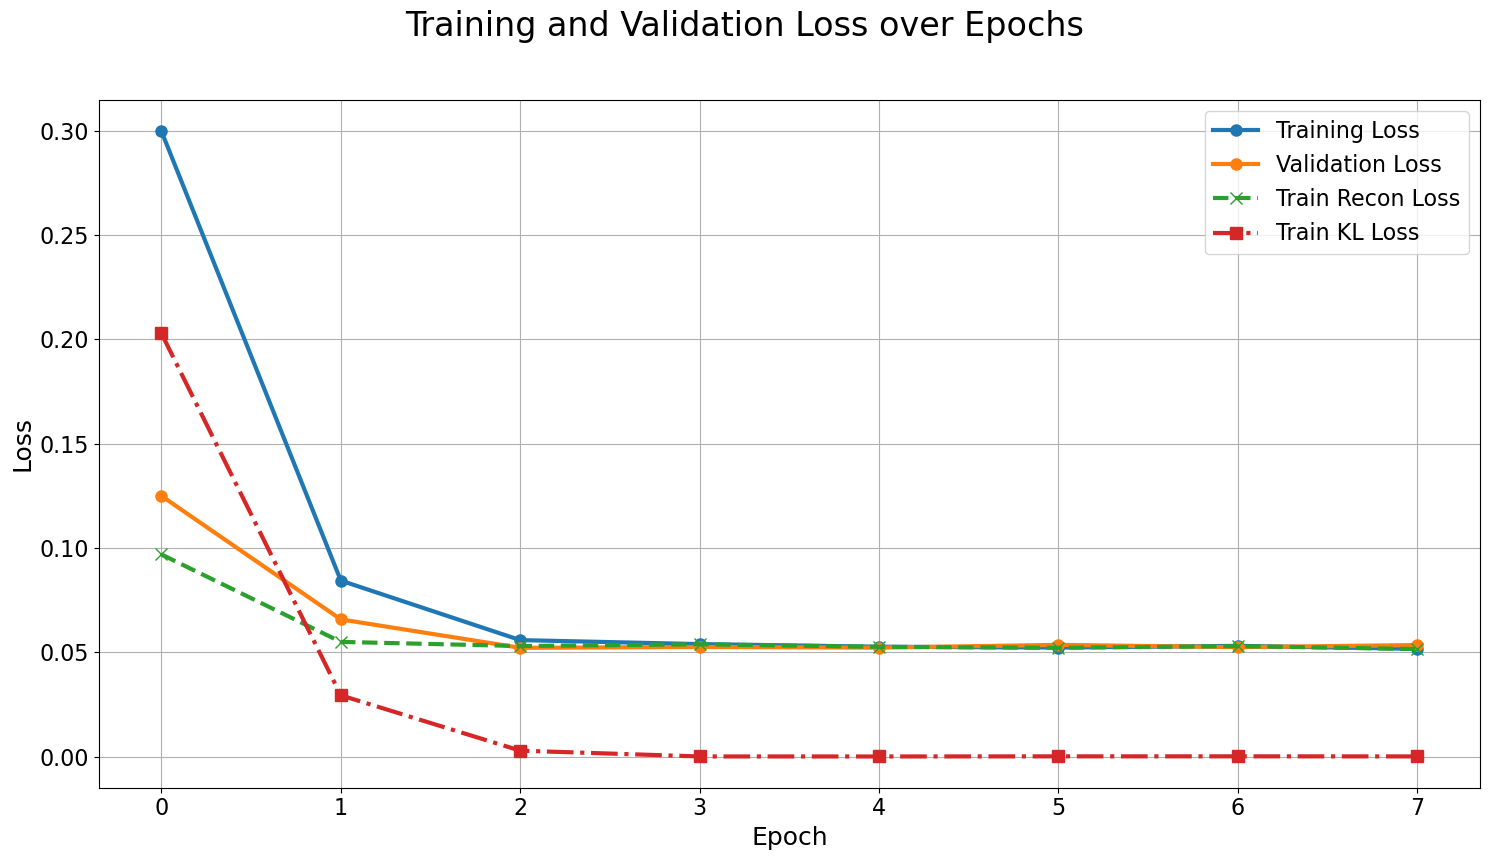

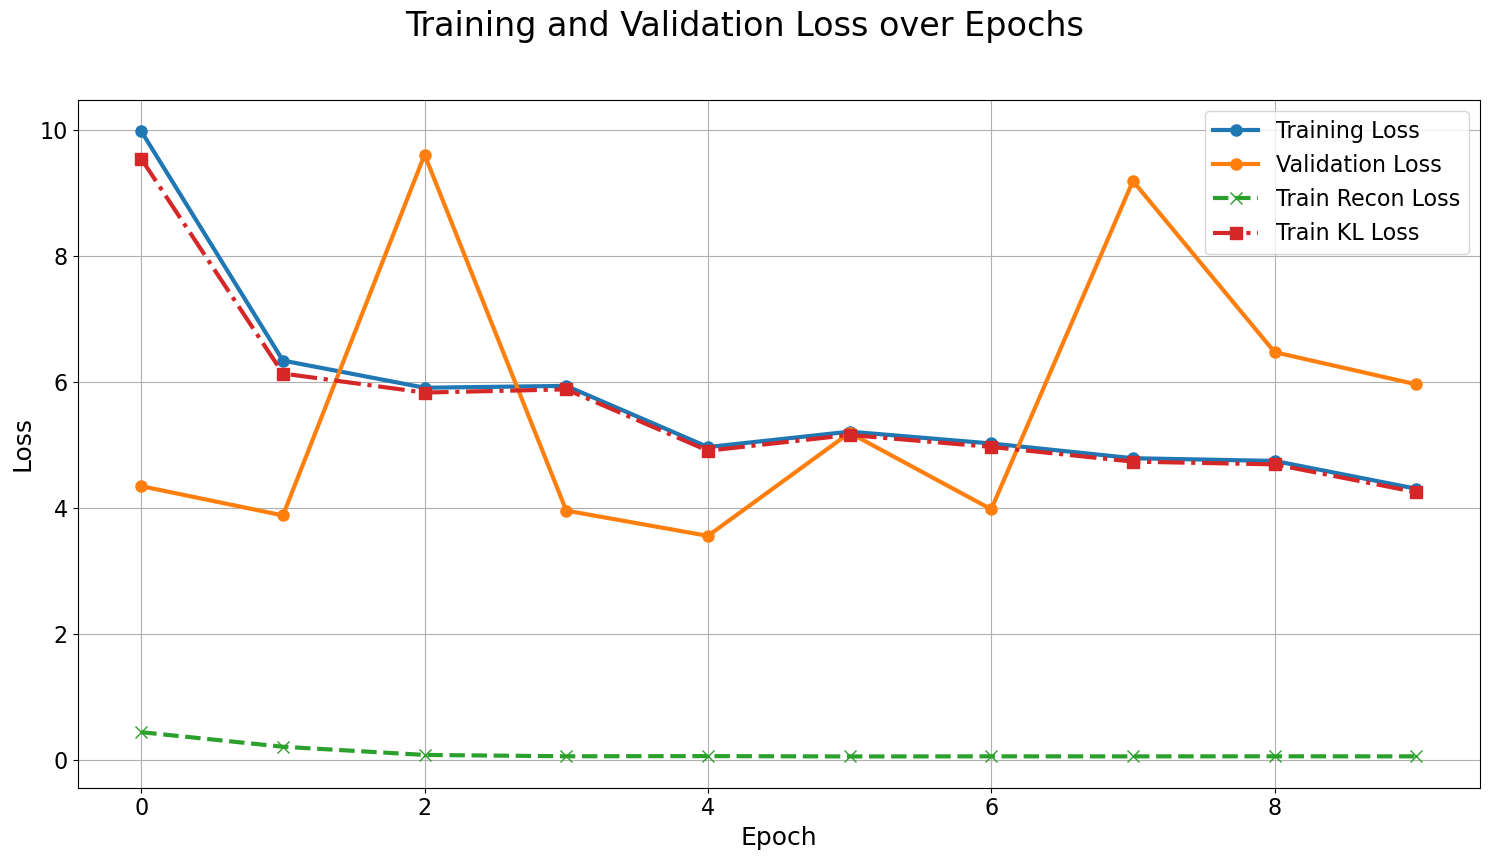

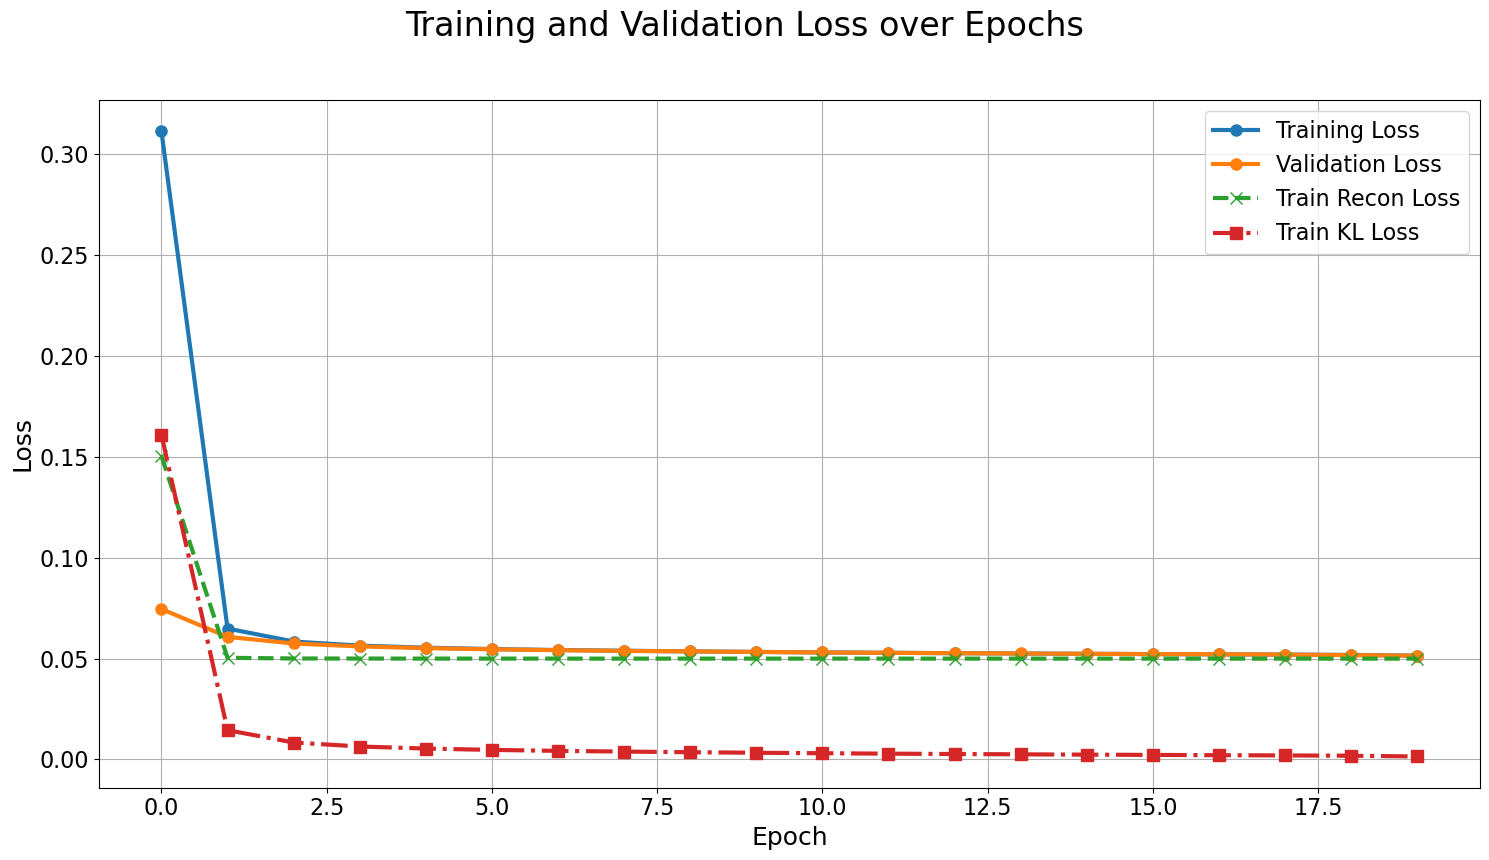

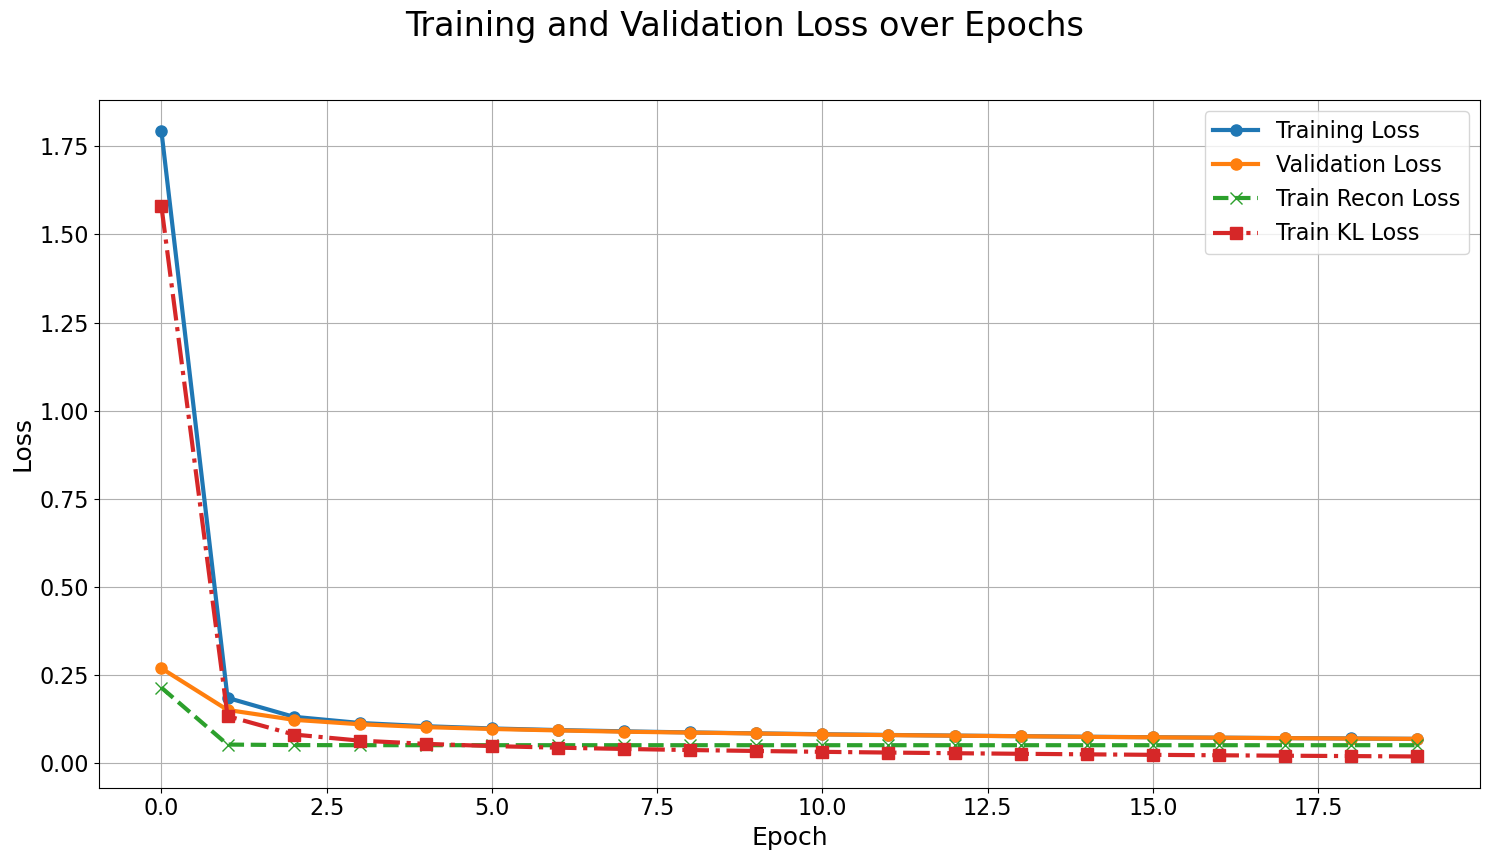

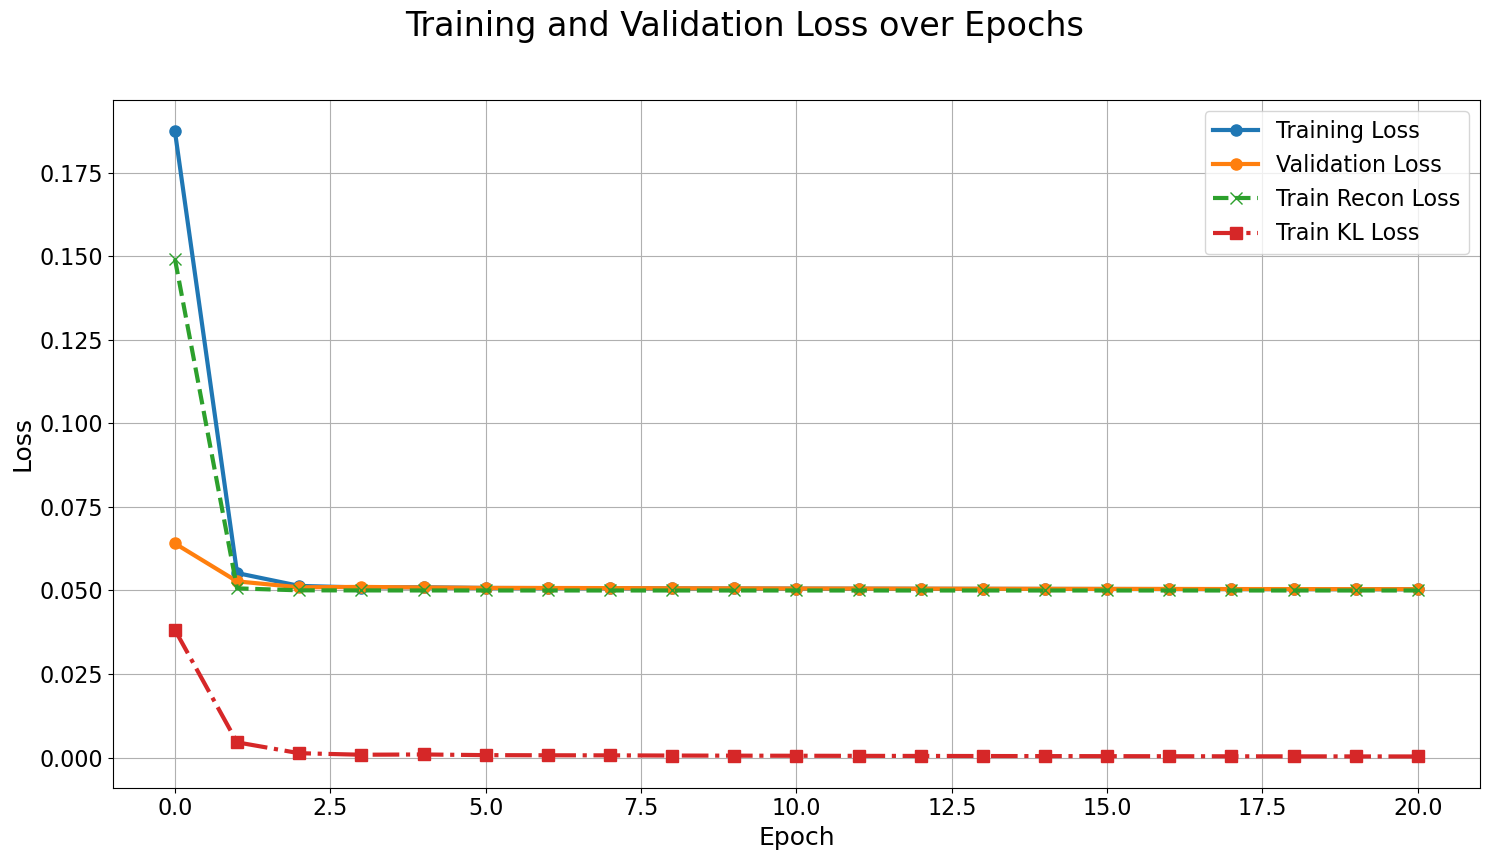

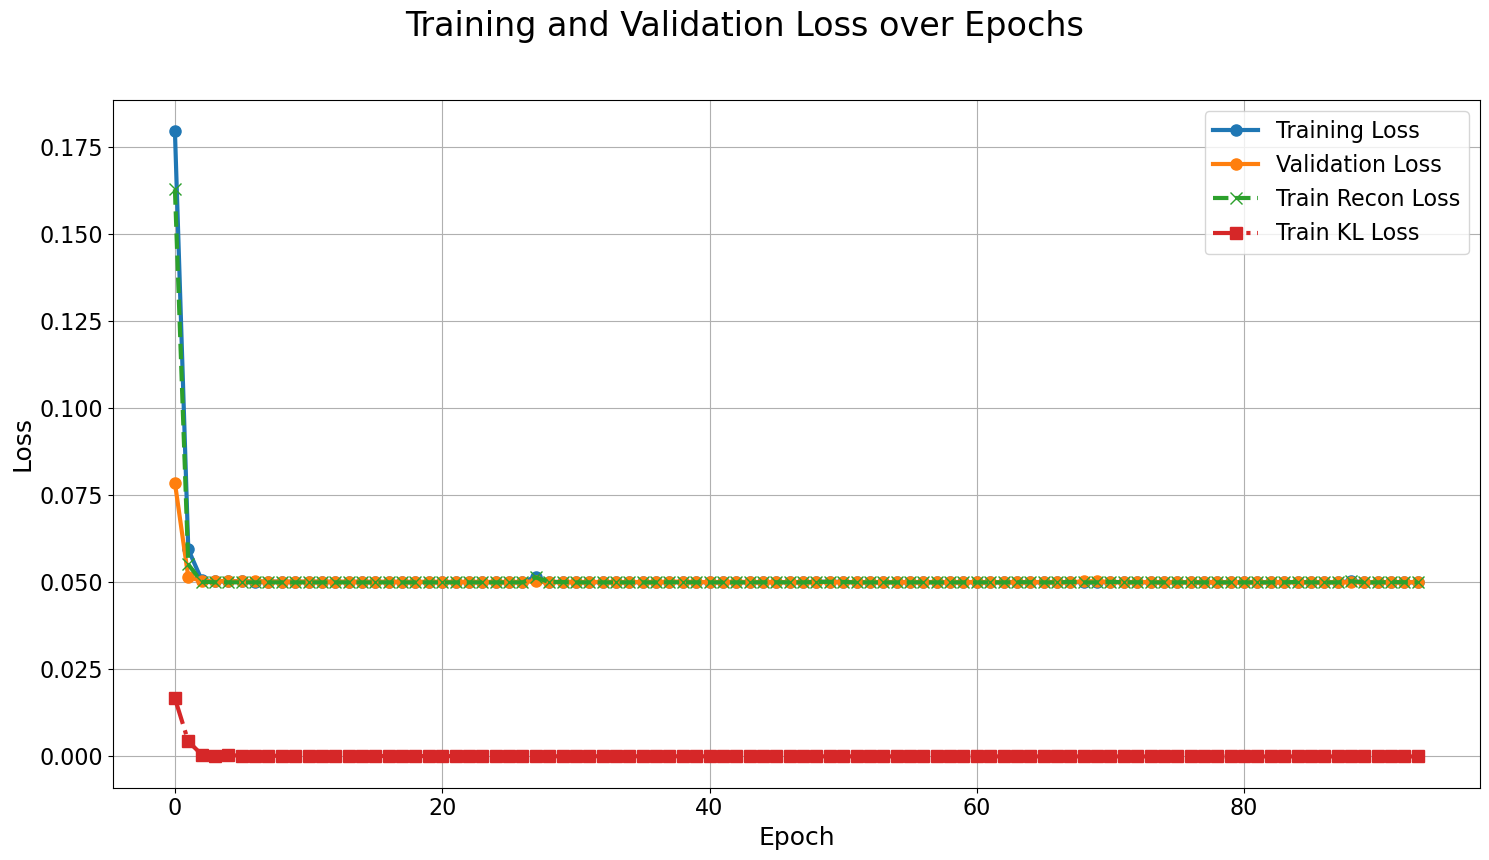

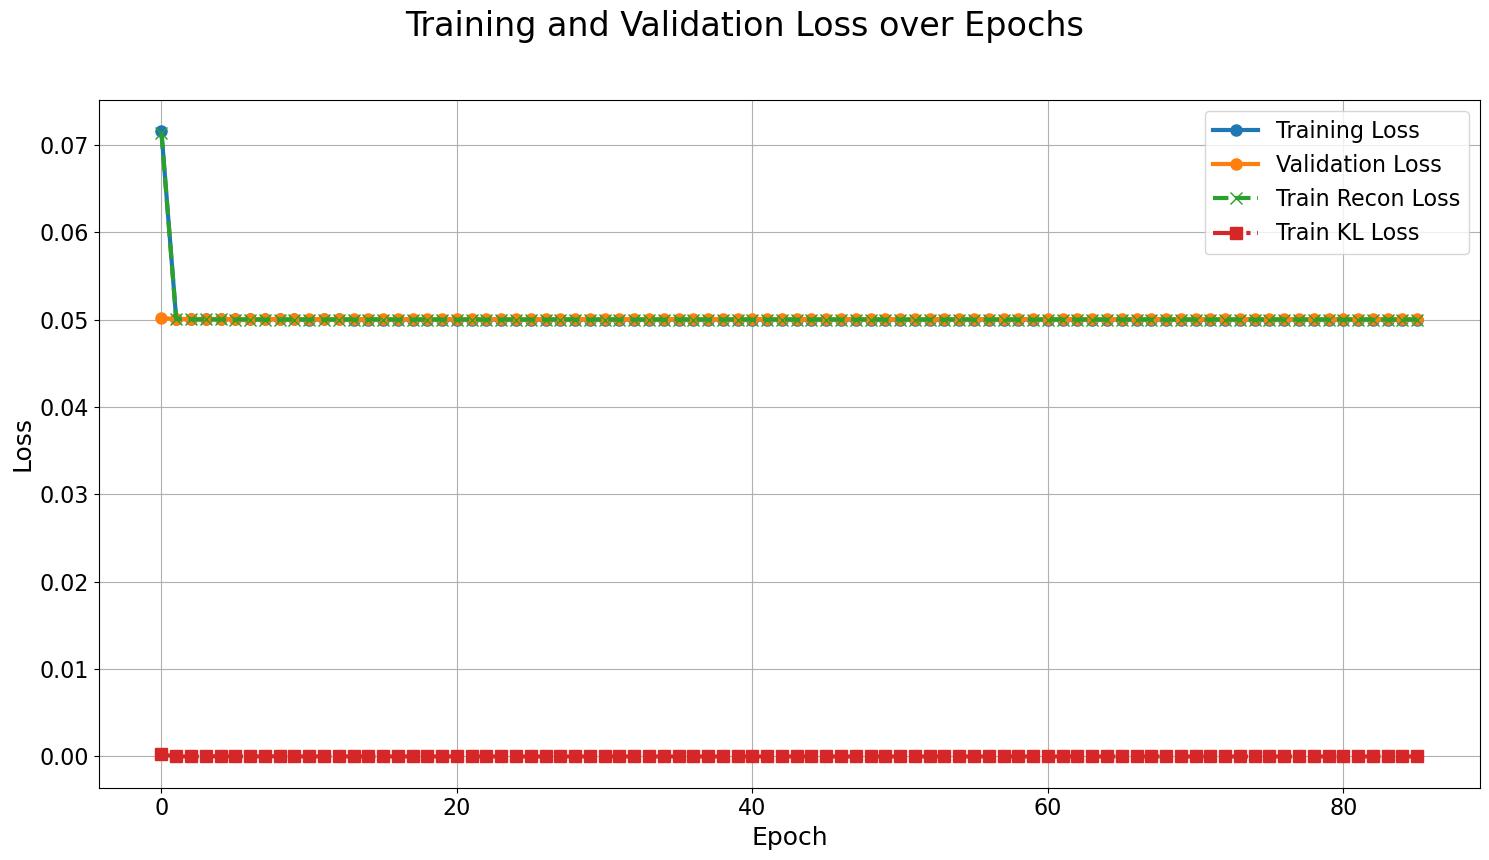

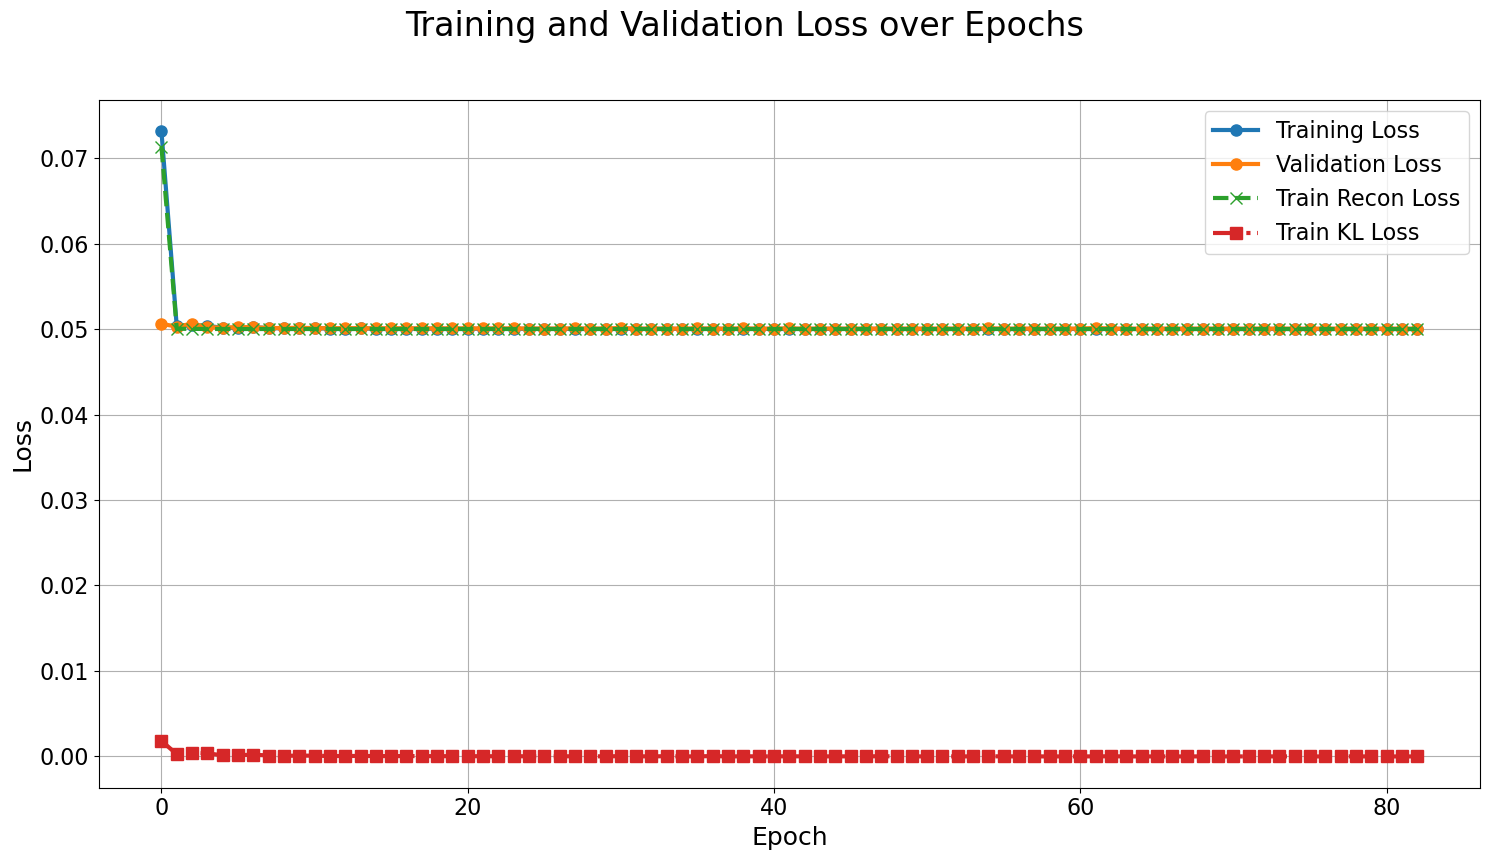

In [35]:
for file_path in file_paths:
    plot_training_and_validation_losses(file_path)

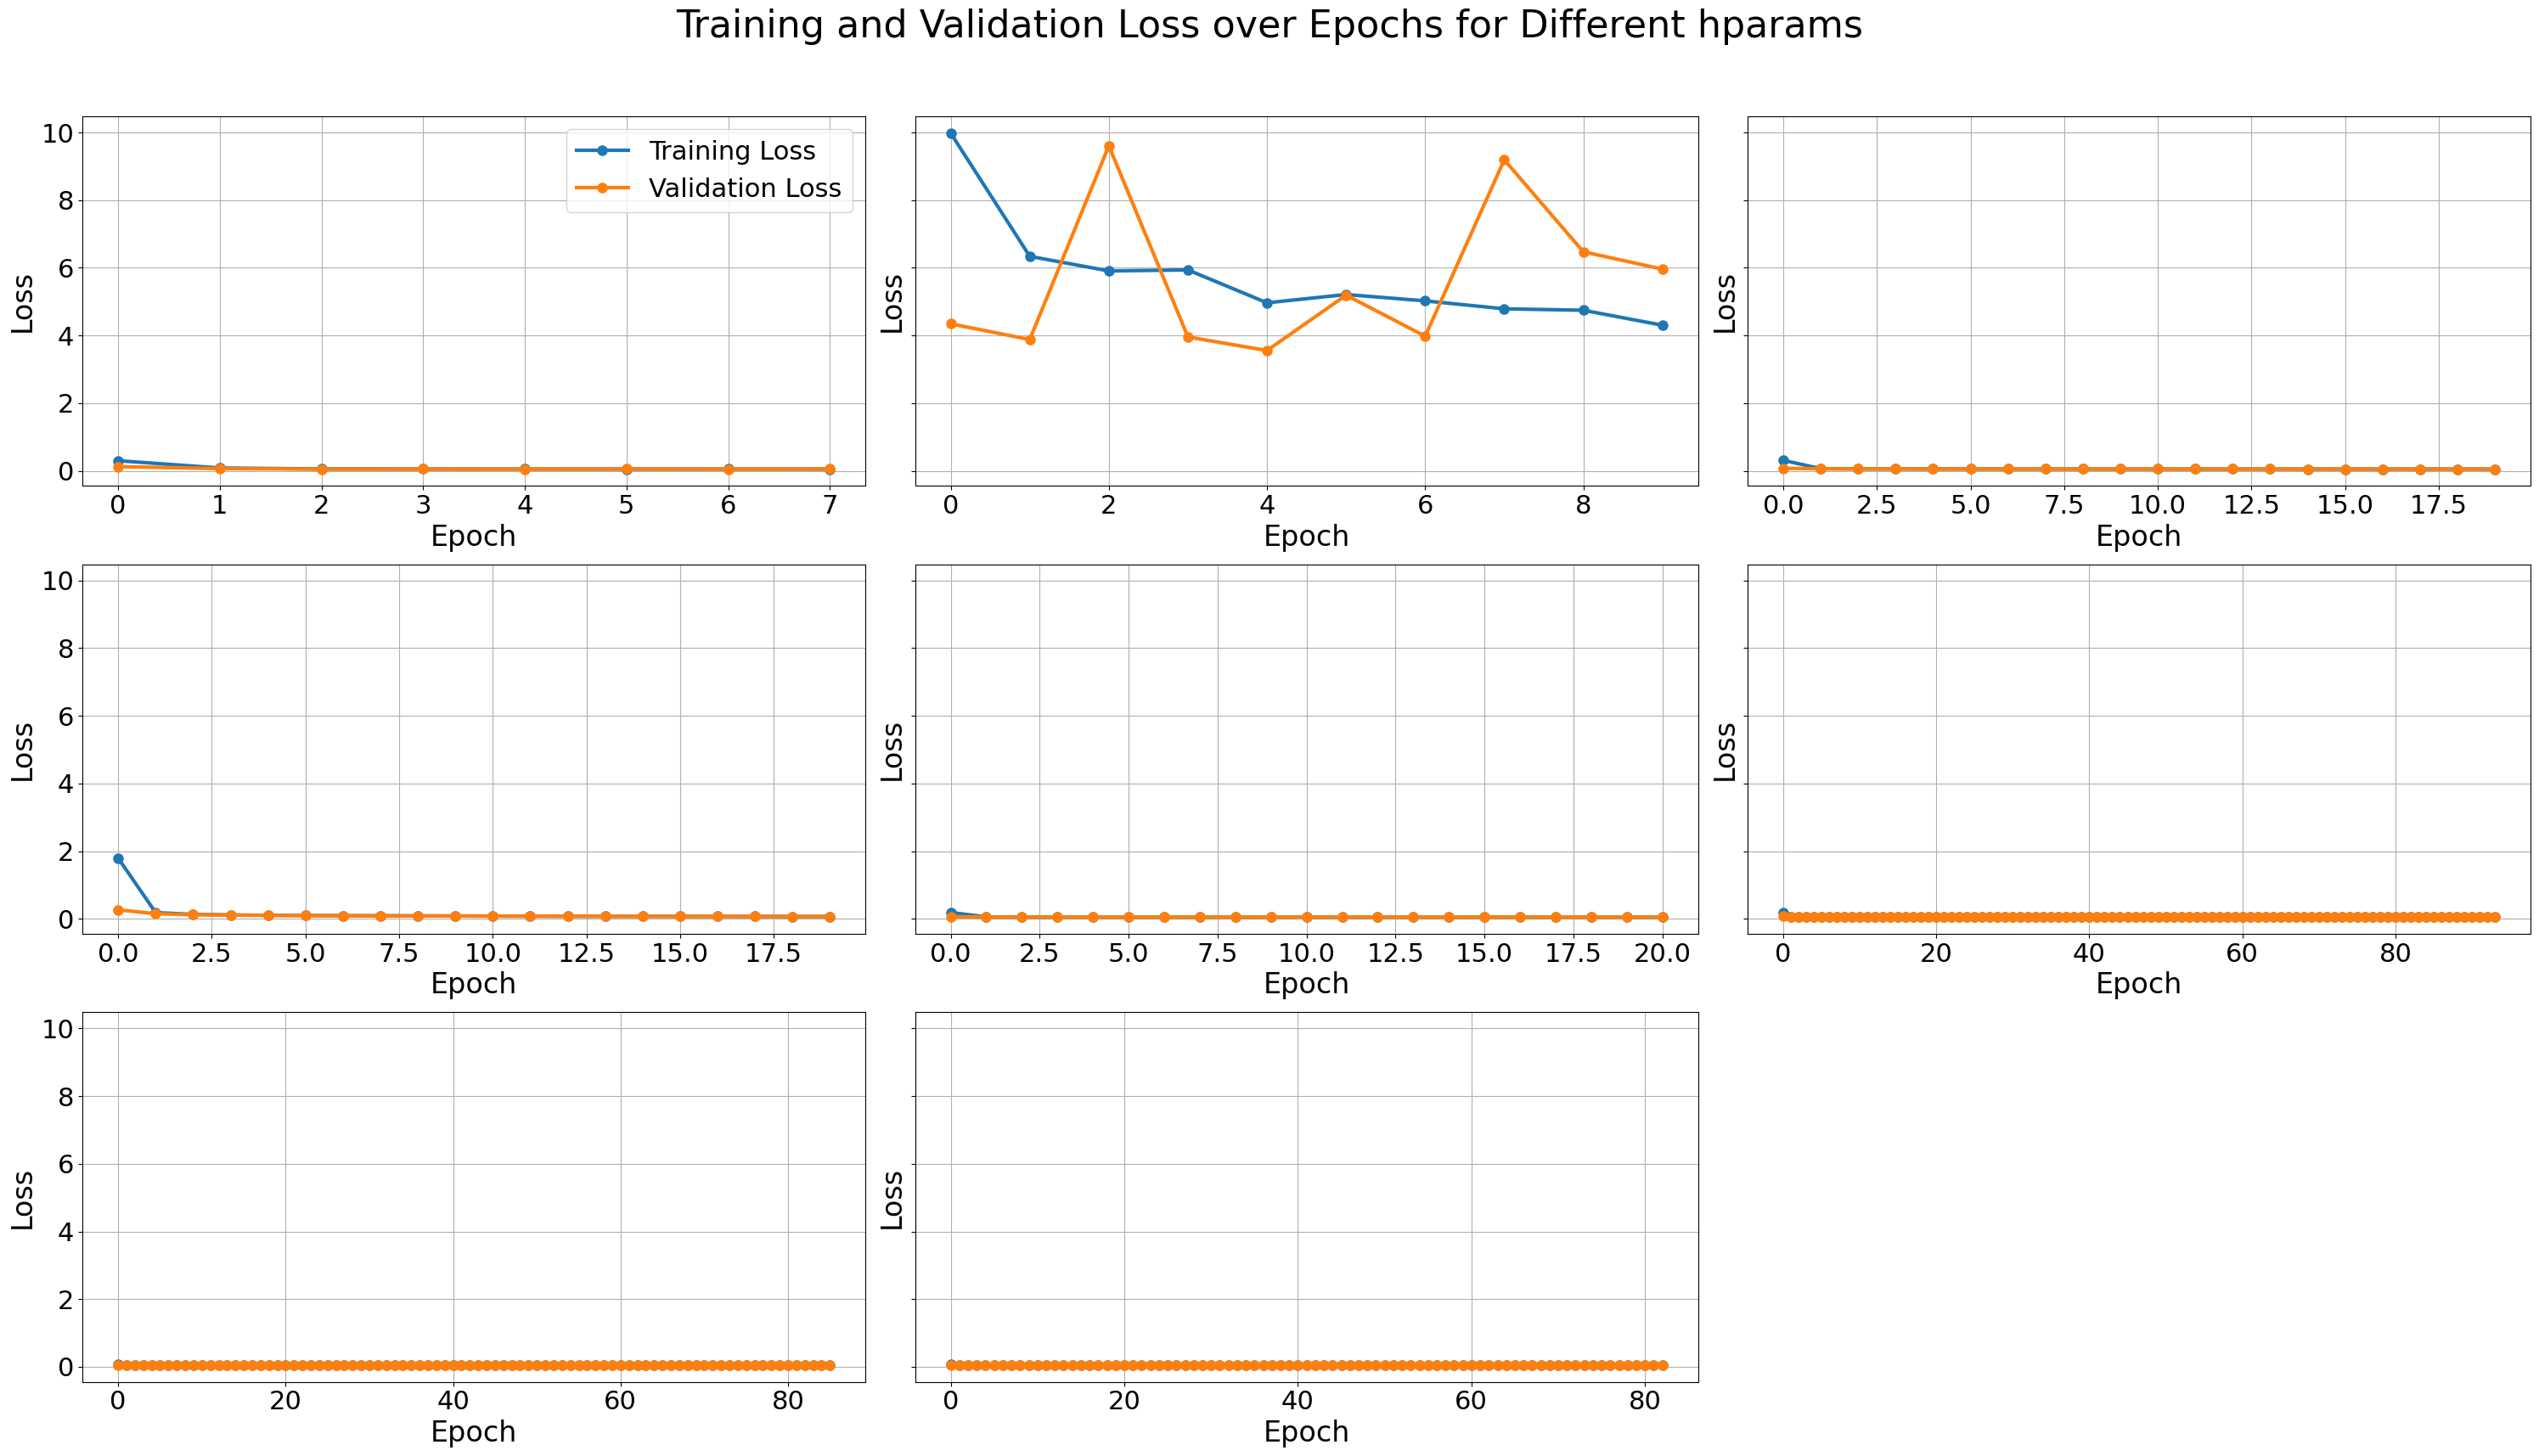

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Data sizes to consider
#data_sizes = ['5000', '10000', '20000', '37067', 'shuffled_10000']

# Create subplots for each data size
fig, axes = plt.subplots(3, 3, figsize=(30, 18), sharey=True)
fig.suptitle('Training and Validation Loss over Epochs for Different hparams', fontsize=32)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each data size and create a subplot
for i in range(8):
    # Assume each data size has a separate version directory
    file_path = f"../experiments/random_data_zero_vae/vae/version_{i}/metrics.csv"
    df_logs = pd.read_csv(file_path)

    # Extract relevant columns
    epochs = df_logs['epoch'].unique()  # Get unique epoch values
    train_loss = df_logs['train_loss'].dropna()  # Drop NaN values for train loss
    val_loss = df_logs['val_loss'].dropna()      # Drop NaN values for validation loss

    # Plot on the corresponding axis
    ax = axes[i]
    ax.plot(epochs[:len(train_loss)], train_loss, label='Training Loss', marker='o', markersize=8, linewidth=3)
    ax.plot(epochs[:len(val_loss)], val_loss, label='Validation Loss', marker='o', markersize=8, linewidth=3)
    #ax.set_title(f'Data Size: {data_size}', fontsize=28)
    ax.set_xlabel('Epoch', fontsize=24)
    ax.set_ylabel('Loss', fontsize=24)
    ax.tick_params(axis='both', which='major', labelsize=22)
    ax.grid(True)
    if i == 0:
        ax.legend(fontsize=22)  # Add legend only to the first subplot

# Hide any unused subplots
for j in range(8, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [17]:
for hparams_path in hparams_paths:
    print(load_config(hparams_path))

{'activation': 'tanh', 'batch_norm': True, 'dropout_rate': 0.0, 'hidden_dims': [10000, 5000, 2048], 'input_dim': 20000, 'kl_weight': 1.0, 'latent_dim': 1024, 'lr': 0.0001}
{'activation': 'tanh', 'batch_norm': True, 'dropout_rate': 0.0, 'hidden_dims': [10000, 5000, 2048], 'input_dim': 20000, 'kl_weight': 1.0, 'latent_dim': 1024, 'lr': 0.001}
{'activation': 'tanh', 'batch_norm': True, 'dropout_rate': 0.0, 'hidden_dims': [10000, 5000, 2048], 'input_dim': 20000, 'kl_weight': 1.0, 'latent_dim': 1024, 'lr': 1e-05}
{'activation': 'tanh', 'batch_norm': True, 'dropout_rate': 0.0, 'hidden_dims': [10000, 5000, 2048], 'input_dim': 20000, 'kl_weight': 10.0, 'latent_dim': 1024, 'lr': 1e-05}
{'activation': 'tanh', 'batch_norm': True, 'dropout_rate': 0.0, 'hidden_dims': [10000, 5000, 2048], 'input_dim': 20000, 'kl_weight': 0.2, 'latent_dim': 1024, 'lr': 1e-05}
{'activation': 'tanh', 'batch_norm': True, 'dropout_rate': 0.0, 'hidden_dims': [10000, 5000, 2048], 'input_dim': 20000, 'kl_weight': 0.05, 'lat

In [36]:
# Reconstruct selected rows of training data
original_matrix, reconstructed_matrix = reconstruct_data(vae_model, X_train, num_rows=10)

# Print the original and reconstructed matrices
print("Original Matrix:\n", original_matrix)
print("Reconstructed Matrix:\n", reconstructed_matrix)


NameError: name 'vae_model' is not defined

In [31]:
cor = correlation_between_rows(original_matrix, reconstructed_matrix)


In [32]:
print(f"maximum correlation: {np.max(cor)}")
print(f"median correlation: {np.median(cor)}")

maximum correlation: 0.05342454432337337
median correlation: 0.026671688081430948


In [ ]:
i = 4
file_path = f"../experiments/random_data_zero_vae/vae/version_{i}/metrics.csv"
hparams_path = f'../experiments/random_data_zero_vae/vae/version_{i}/hparams.yaml'
checkpoint_path = f"../experiments/random_data_zero_vae/vae/version_4/checkpoints/vae-epoch=02-val_loss=0.05.ckpt"

i = 5
file_path = f"../experiments/random_data_zero_vae/vae/version_{i}/metrics.csv"
hparams_path = f'../experiments/random_data_zero_vae/vae/version_{i}/hparams.yaml'
checkpoint_path = f"../experiments/random_data_zero_vae/vae/version_5/checkpoints/vae-epoch=01-val_loss=0.05.ckpt"